In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipywidgets as widgets
from ipywidgets.widgets import interact, interact_manual
import re
import datetime as dt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA


# Data

In [155]:
df_customer = pd.read_csv('twm_customer.csv', sep=';')
df_customer.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [156]:
print(df_customer.shape)
print(df_customer.isnull().sum())
print('# of unique customer IDs: ', df_customer['cust_id'].nunique())

(747, 15)
cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64
# of unique customer IDs:  747


In [157]:
df_accounts = pd.read_csv('twm_accounts.csv', sep=';')
df_accounts.head(3)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00


In [158]:
print(df_accounts.shape)
print(df_accounts.isnull().sum())
print('# of unique customer IDs: ', df_accounts['cust_id'].nunique())
print('# of unique ACCOUNT numbers: ', df_accounts['acct_nbr'].nunique())
# Customers can have multiple accounts.

(1409, 8)
acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
dtype: int64
# of unique customer IDs:  665
# of unique ACCOUNT numbers:  1409


In [159]:
df_checking_acct = pd.read_csv('twm_checking_acct.csv', sep=';')
df_checking_acct.head(3)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.0,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.0,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.0,Y,19.3.1994,NaN,2694.91,147.15


In [160]:
print(df_checking_acct.shape)
print(df_checking_acct.isnull().sum())
print('# of unique customer IDs: ', df_checking_acct['cust_id'].nunique())

(520, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
per_check_fee         0
account_active        0
acct_start_date       0
acct_end_date       468
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  520


In [161]:
df_credit_acct = pd.read_csv('twm_credit_acct.csv', sep=';')
df_credit_acct.head(3)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68


In [162]:
print(df_credit_acct.shape)
print(df_credit_acct.isnull().sum())
print('# of unique customer IDs: ', df_credit_acct['cust_id'].nunique())

(468, 9)
cust_id               0
acct_nbr              0
credit_limit          0
credit_rating         0
account_active        0
acct_start_date       0
acct_end_date       423
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  468


In [163]:
df_savings_acct = pd.read_csv('twm_savings_acct.csv', sep=';')
df_savings_acct.head(3)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02


In [164]:
print(df_savings_acct.shape)
print(df_savings_acct.isnull().sum())
print('# of unique customer IDs: ', df_savings_acct['cust_id'].nunique())

(421, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  421


In [165]:
df_transactions = pd.read_csv('twm_transactions.csv', sep=';')
df_transactions.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


In [166]:
print(df_transactions.shape)
print(df_transactions.isnull().sum())
print('# of ACCOUNT numbers: ', df_transactions['acct_nbr'].nunique())

(77580, 10)
tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of ACCOUNT numbers:  1398


In [167]:
df_checking_tran = pd.read_csv('twm_checking_tran.csv', sep=';')
df_checking_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ


In [168]:
print(df_checking_tran.shape)
print(df_checking_tran.isnull().sum())
print('# of unique customer IDs: ', df_checking_tran['cust_id'].nunique())

(46204, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  520


In [169]:
df_credit_tran = pd.read_csv('twm_credit_tran.csv', sep=';')
df_credit_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ


In [170]:
print(df_credit_tran.shape)
print(df_credit_tran.isnull().sum())
print('# of unique customer IDs: ', df_credit_tran['cust_id'].nunique())

(20167, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  457


In [171]:
df_savings_tran = pd.read_csv('twm_savings_tran.csv', sep=';')
df_savings_tran.head(3)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN


In [172]:
print(df_savings_tran.shape)
print(df_savings_tran.isnull().sum())
print('# of unique customer IDs: ', df_savings_tran['cust_id'].nunique())

(11189, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  420


# Analysis

Customer segmentation based on demographics:

In [173]:
df_customer2 = df_customer.copy()
#df_customer2['gender_num'] = df_customer2.apply(lambda row: 0 if row['gender']=='M ' else 1, axis=1)
df_customer2.head(3)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA


In [174]:
def plot_distortion(dataframe_name, max_clusters = 10):
    distortions = []
    
    scaler = MinMaxScaler()
    df_seg_scaled = pd.DataFrame(scaler.fit_transform(dataframe_name.astype(float)))
    
    X = df_seg_scaled.to_numpy()
    
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Distortion Plot')
    plt.show() 

In [175]:
def plot_clusters(dataframe_name, cols, num_clusters, plt_cluster_centers = False):
    # cols = list of two column numbers
    
    scaler = StandardScaler()
    df_customer_scaled = pd.DataFrame(scaler.fit_transform(dataframe_name.iloc[:,cols].astype(float)))
    X = df_customer_scaled.to_numpy()
    
    col1_title = dataframe_name.columns[cols[0]]
    col2_title = dataframe_name.columns[cols[1]]
    
    km = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
    y_res = km.fit_predict(X)
    
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        
        plt.scatter(x, y, s=50, marker='s', label = f'cluster {cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, marker = '*', c = 'red', s = 250, label = 'centroids')
    
    plt.legend()
    plt.grid()
    plt.title(f'KMeans Clustering of {col1_title} and {col2_title}')
    
    #plt.rcParams["figure.figsize"] = (6,4)
    
    return

## Customer segmentation based on their banking behavior:

In [218]:
df_cust_accounts = pd.merge(df_customer,df_accounts,on='cust_id')[['cust_id','income','years_with_bank','age','gender','nbr_children','marital_status',
                                                                   'acct_nbr','acct_type','acct_end_date',
                                                                   'ending_balance']]
df_cust_accounts.nunique()

cust_id             665
income              581
years_with_bank      10
age                  76
gender                2
nbr_children          6
marital_status        4
acct_nbr           1409
acct_type             3
acct_end_date       120
ending_balance     1213
dtype: int64

In [219]:
df_cust_accounts['acct_type'].value_counts()
#CC = credit
#CK = checking
#SV = savings
df_cust_accounts['credit_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CC  ']
df_cust_accounts['checking_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CK  ']
df_cust_accounts['savings_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='SV  ']
#df_cust_accounts['total_balance'] = df_cust_accounts['savings_balance'] + df_cust_accounts['checking_balance'] - df_cust_accounts['credit_balance']
df_cust_accounts.head(3)

,cust_id,income,years_with_bank,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,ending_balance,credit_balance,checking_balance,savings_balance
0,1362487,6605,1,71,M,0,2,4561143213624870,CC,NaN,1548.23,1548.23,NaN,NaN
1,1362487,6605,1,71,M,0,2,13624873,SV,25.8.1995,12.89,NaN,NaN,12.89
2,1362487,6605,1,71,M,0,2,13624872,CK,NaN,1401.21,NaN,1401.21,NaN


In [261]:
df_cust_info = df_cust_accounts.loc[:,~df_cust_accounts.columns.isin(['acct_nbr','ending_balance','acct_end_date','acct_type'])]
df_cust_info = df_cust_info.groupby(['cust_id','income','years_with_bank','age','gender','nbr_children','marital_status']).sum().reset_index()
df_cust_info['total_balance'] = df_cust_info['checking_balance']+df_cust_info['savings_balance']-df_cust_info['credit_balance']
df_cust_info.head(3)

,cust_id,income,years_with_bank,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,3,33,M,2,2,20.00,86.86,1187.97,1254.83
1,1362484,10053,2,42,F,0,1,369.72,95.32,2122.17,1847.77
2,1362485,22690,4,25,F,0,1,1100.00,45.49,0.00,-1054.51


In [221]:
df_n = df_cust_accounts[['cust_id','acct_type','acct_nbr']].groupby(['cust_id','acct_type']).count()
df_n[df_n['acct_nbr']>1]

,,acct_nbr
cust_id,acct_type,


### Transactions analysis

In [222]:
df_transactions2 = df_transactions.copy()

In [223]:
df_transactions2.head(3)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD


In [224]:
df_count_transacations = df_transactions2.groupby('acct_nbr').count()['tran_amt'].reset_index()
df_count_transacations = df_count_transacations.rename(columns={'tran_amt':'count_tran_amt'})
df_count_transacations.head(3)

,acct_nbr,count_tran_amt
0,13624802,99
1,13624803,26
2,13624842,99


In [225]:
df_transacation_stats = df_transactions2.groupby('acct_nbr').mean()['tran_amt'].reset_index()
df_transacation_stats = df_transacation_stats.rename(columns={'tran_amt':'avg_tran_amt'})
df_transacation_stats['count_tran_amt'] = df_count_transacations['count_tran_amt']
df_transacation_stats.head(3)

,acct_nbr,avg_tran_amt,count_tran_amt
0,13624802,-2.474646,99
1,13624803,18.550769,26
2,13624842,-25.435758,99


In [185]:
# No need to use
#df_account_transaction_summary = pd.merge(df_accounts,df_transacation_stats,on='acct_nbr')[['acct_nbr','cust_id','acct_type','avg_tran_amt','count_tran_amt','starting_balance',
#                                                                                               'ending_balance','account_active','acct_start_date',
#                                                                                               'acct_end_date']]
#df_account_transaction_summary.head(3)

In [226]:
df_cust_accounts2 = pd.merge(df_cust_accounts, df_transacation_stats,how = 'left')
df_cust_accounts2.head(3)

,cust_id,income,years_with_bank,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,ending_balance,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt
0,1362487,6605,1,71,M,0,2,4561143213624870,CC,NaN,1548.23,1548.23,NaN,NaN,-47.987188,32.0
1,1362487,6605,1,71,M,0,2,13624873,SV,25.8.1995,12.89,NaN,NaN,12.89,-33.623158,19.0
2,1362487,6605,1,71,M,0,2,13624872,CK,NaN,1401.21,NaN,1401.21,NaN,-26.513269,52.0


In [227]:
df_cust_accounts2['avg_savings_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='SV  ']
df_cust_accounts2['avg_checking_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='CK  ']
df_cust_accounts2['avg_credit_tran_amt'] = df_cust_accounts2['avg_tran_amt'][df_cust_accounts2['acct_type']=='CC  ']
df_cust_accounts2['cnt_savings_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='SV  ']
df_cust_accounts2['cnt_checking_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='CK  ']
df_cust_accounts2['cnt_credit_tran'] = df_cust_accounts2['count_tran_amt'][df_cust_accounts2['acct_type']=='CC  ']
df_cust_accounts2.head(3)

,cust_id,income,years_with_bank,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,...,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran
0,1362487,6605,1,71,M,0,2,4561143213624870,CC,NaN,...,NaN,NaN,-47.987188,32.0,NaN,NaN,-47.987188,NaN,NaN,32.0
1,1362487,6605,1,71,M,0,2,13624873,SV,25.8.1995,...,NaN,12.89,-33.623158,19.0,-33.623158,NaN,NaN,19.0,NaN,NaN
2,1362487,6605,1,71,M,0,2,13624872,CK,NaN,...,1401.21,NaN,-26.513269,52.0,NaN,-26.513269,NaN,NaN,52.0,NaN


In [228]:
df_cust_info2 = df_cust_info.copy()
df_cust_info2.head(3)

,cust_id,income,years_with_bank,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,3,33,M,2,2,20.00,86.86,1187.97,1254.83
1,1362484,10053,2,42,F,0,1,369.72,95.32,2122.17,1847.77
2,1362485,22690,4,25,F,0,1,1100.00,45.49,0.00,-1054.51


In [229]:
df_cust_accounts2.columns

Index(['cust_id', 'income', 'years_with_bank', 'age', 'gender', 'nbr_children',
       'marital_status', 'acct_nbr', 'acct_type', 'acct_end_date',
       'ending_balance', 'credit_balance', 'checking_balance',
       'savings_balance', 'avg_tran_amt', 'count_tran_amt',
       'avg_savings_tran_amt', 'avg_checking_tran_amt', 'avg_credit_tran_amt',
       'cnt_savings_tran', 'cnt_checking_tran', 'cnt_credit_tran'],
      dtype='object')

In [262]:
df_cust_info2 = df_cust_accounts2.loc[:,~df_cust_accounts2.columns.isin(['acct_nbr','ending_balance','acct_end_date','acct_type'])]
df_cust_info2 = df_cust_info2.groupby(['cust_id','income','age','gender','nbr_children','marital_status']).sum().reset_index()
df_cust_info2['total_balance'] = df_cust_info2['checking_balance'] + df_cust_info2['savings_balance'] - df_cust_info2['credit_balance']
df_cust_info2.head(3)

,cust_id,income,age,gender,nbr_children,marital_status,years_with_bank,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran,total_balance
0,1362480,50890,33,M,2,2,9,20.00,86.86,1187.97,76.971748,157.0,18.550769,-2.474646,60.895625,26.0,99.0,32.0,1254.83
1,1362484,10053,42,F,0,1,6,369.72,95.32,2122.17,49.836424,187.0,58.474545,-25.435758,16.797636,33.0,99.0,55.0,1847.77
2,1362485,22690,25,F,0,1,8,1100.00,45.49,0.00,-12.232134,171.0,0.000000,-1.659495,-10.572639,0.0,99.0,72.0,-1054.51


### Demographic clustering

In [120]:
segmentation_cols = ['income', 'age','years_with_bank','nbr_children','marital_status','gender']

In [213]:
df_seg_full = df_customer[segmentation_cols]
df_seg_full['marital_status'] = df_seg_full['marital_status'].astype('category')
df_seg_full = pd.get_dummies(df_seg_full, drop_first=True)
df_seg_full.head(3)

<ipython-input-214-852acae2c5f2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,income,age,years_with_bank,nbr_children,marital_status_2,marital_status_3,marital_status_4,gender_M
0,26150,46,5,1,1,0,0,1
1,6605,71,1,0,1,0,0,1
2,18548,38,8,0,0,0,0,0


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



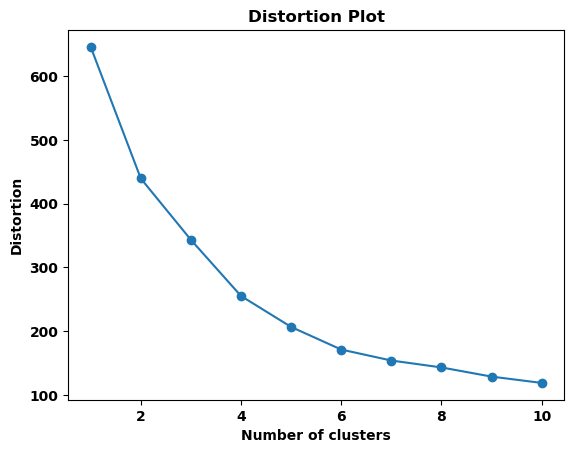

In [141]:
# Demographics distortion plot
plot_distortion(df_seg_full)

# **Main function**

In [123]:
def Nik(dataframe, ScalingMethod, ClusteringMethod, NumberOfClusters, epsilon=0.5, min_samples=5):   
    if ScalingMethod == 'MinMax':
        scaler = MinMaxScaler()
    elif ScalingMethod == 'Standard':
        scaler = StandardScaler()
    elif ScalingMethod == 'Robust':
        scaler = RobustScaler()
    elif ScalingMethod == 'MaxAbs':
        scaler = MaxAbsScaler()
    else:
        print('Error: no valid scaler specified')
        
    df_scaled = pd.DataFrame(scaler.fit_transform(dataframe.astype(float)), columns = dataframe.columns)
    
    if ClusteringMethod == 'KMeans':
        df_scaled['Cluster'] = KMeans(n_clusters=NumberOfClusters, n_init=10).fit_predict(df_scaled)
    elif ClusteringMethod == 'Agglomerative':
        ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = NumberOfClusters)
        df_scaled['Cluster'] = ac.fit_predict(df_scaled)
    elif ClusteringMethod == 'DBSCAN':
        db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
        df_scaled['Cluster'] = db.fit_predict(df_scaled)
    else:
        print('Error: no valid clustering method specified')
    
    df_radar = df_scaled.groupby('Cluster').mean().divide(df_scaled.drop('Cluster',axis=1).mean())*100
    
    return df_radar

In [142]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_seg_full_transformed = vt.fit_transform(df_seg_full)

# columns we have selected
# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = df_seg_full.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
df_seg_full_transformed = pd.DataFrame(df_seg_full_transformed, columns = selected_columns)

In [216]:
# step 1
df_corr = df_seg_full_transformed.corr().abs()
df_corr

,income,age,years_with_bank,nbr_children,marital_status_2,gender_M
income,1.000000,0.244919,0.040604,0.283352,0.164599,0.147011
age,0.244919,1.000000,0.181478,0.057195,0.412111,0.008516
years_with_bank,0.040604,0.181478,1.000000,0.034814,0.055764,0.004427
nbr_children,0.283352,0.057195,0.034814,1.000000,0.256925,0.009320
marital_status_2,0.164599,0.412111,0.055764,0.256925,1.000000,0.046067
gender_M,0.147011,0.008516,0.004427,0.009320,0.046067,1.000000


***Feature Engineering implementation to demographics information***

In [126]:
df_seg_full2 = df_seg_full.copy()
df_seg_full2 = df_seg_full2.drop(['years_with_bank', 'gender_M '], axis=1)
df_seg_full2

SyntaxError: invalid syntax (<ipython-input-126-88be37b9b19d>, line 3)

### Banking behavior clustering

In [263]:
df_cust_info3 = df_cust_info2.copy()
df_cust_info3.columns
# df_cust_info3 = df_cust_info3.drop(columns=['cust_id', 'age', 'gender', 'nbr_children', 'marital_status'])
segmentation_cols = ['income', 'age','years_with_bank','nbr_children','marital_status','gender',
                     'credit_balance', 'checking_balance','savings_balance', 'avg_tran_amt', 'count_tran_amt',
                     'avg_savings_tran_amt', 'avg_checking_tran_amt', 'avg_credit_tran_amt',
                     'cnt_savings_tran', 'cnt_checking_tran', 'cnt_credit_tran',
                     'total_balance']
df_cust_seg = df_cust_info3[segmentation_cols]
df_cust_seg['marital_status'] = df_cust_seg['marital_status'].astype('category')
df_cust_seg = pd.get_dummies(df_cust_seg, drop_first=True)
df_cust_seg.head(3)

<ipython-input-263-ec428e05283f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,income,age,years_with_bank,nbr_children,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran,total_balance,marital_status_2,marital_status_3,marital_status_4,gender_M
0,50890,33,9,2,20.00,86.86,1187.97,76.971748,157.0,18.550769,-2.474646,60.895625,26.0,99.0,32.0,1254.83,1,0,0,1
1,10053,42,6,0,369.72,95.32,2122.17,49.836424,187.0,58.474545,-25.435758,16.797636,33.0,99.0,55.0,1847.77,0,0,0,0
2,22690,25,8,0,1100.00,45.49,0.00,-12.232134,171.0,0.000000,-1.659495,-10.572639,0.0,99.0,72.0,-1054.51,0,0,0,0


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



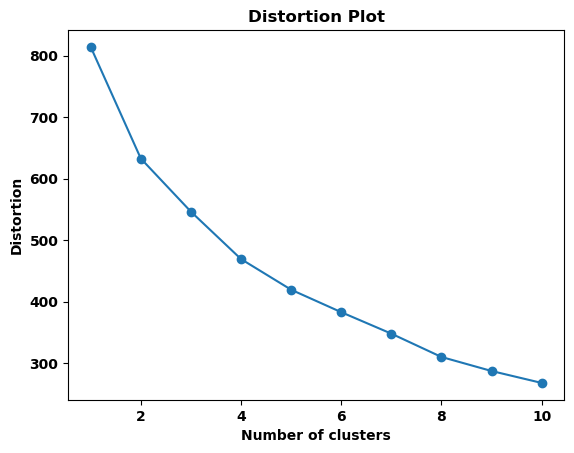

In [264]:
plot_distortion(df_cust_seg)

In [265]:
scaler = MinMaxScaler()
df_habits_scaled = pd.DataFrame(scaler.fit_transform(df_cust_seg.astype(float)),columns = df_cust_seg.columns)
df_habits_scaled['Cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(df_habits_scaled)
df_habits_scaled.head(3)

,income,age,years_with_bank,nbr_children,credit_balance,checking_balance,savings_balance,avg_tran_amt,count_tran_amt,avg_savings_tran_amt,...,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran,total_balance,marital_status_2,marital_status_3,marital_status_4,gender_M,Cluster
0,0.353018,0.263158,0.333333,0.4,0.002105,0.006588,0.052957,0.046217,0.596958,0.375927,...,0.045422,0.419355,1.0,0.206452,0.289715,1.0,0.0,0.0,1.0,2
1,0.069736,0.381579,0.222222,0.0,0.038918,0.007229,0.094601,0.043202,0.711027,0.512149,...,0.040569,0.532258,1.0,0.354839,0.306220,0.0,0.0,0.0,0.0,1
2,0.157398,0.157895,0.296296,0.0,0.115789,0.003450,0.000000,0.036306,0.650190,0.312631,...,0.037557,0.000000,1.0,0.464516,0.225435,0.0,0.0,0.0,0.0,1


In [240]:
df_habits_scaled['Cluster'].value_counts()

2    221
0    207
3    149
1     88
Name: Cluster, dtype: int64

# Radar Chart

In [131]:
def plot_radar_chart(df, mean=False):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    if mean == True:
        data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                    theta= df.columns,
                                    name = 'mean',
                                    fill = 'toself'))
    
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [132]:
# Decent clusters:

# df_seg_full, 'MinMax', 'Agglomerative', 3

***Demographic Radar Chart***

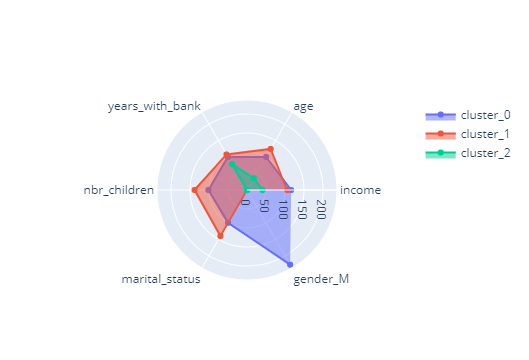

In [ ]:
plot_radar_chart(Nik(df_seg_full, 'MinMax', 'Agglomerative', 3, epsilon=0.2, min_samples=10))

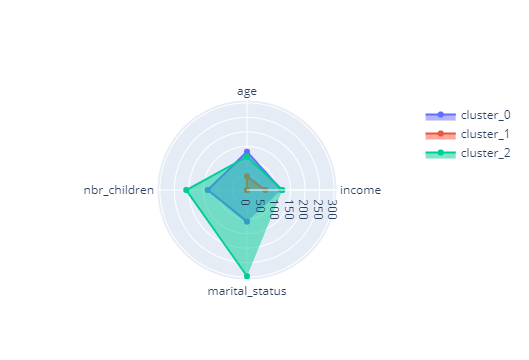

In [134]:
plot_radar_chart(Nik(df_seg_full2, 'MinMax', 'Agglomerative', 3, epsilon=0.2, min_samples=10))

***Banking Behaviour Radar Chart***

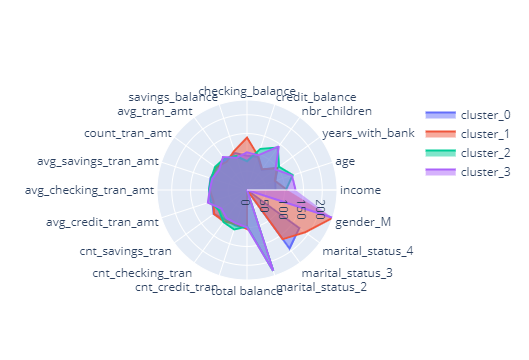

In [241]:
plot_radar_chart(Nik(df_cust_seg, 'MinMax', 'KMeans', 4, epsilon=0.2, min_samples=10))

### Its a lot of information was used, especially numerical data, we need to reduce data's count to and see each features clearly

***Feature Selection implemetation for banking behaviour analysis***

Analyzing clients by their current balances

In [268]:
segmentation_cols = ['income', 'age','years_with_bank','nbr_children','marital_status_2','marital_status_3',
                     'marital_status_4','gender_M ','credit_balance', 'checking_balance','savings_balance']
df_cust_seg2 = df_cust_seg[segmentation_cols]


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



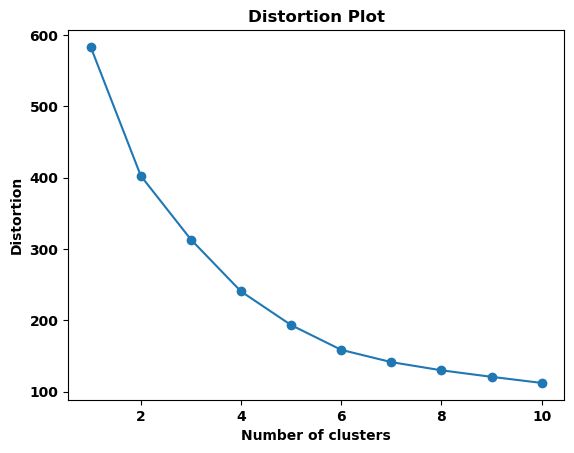

In [285]:
plot_distortion(df_cust_seg2)

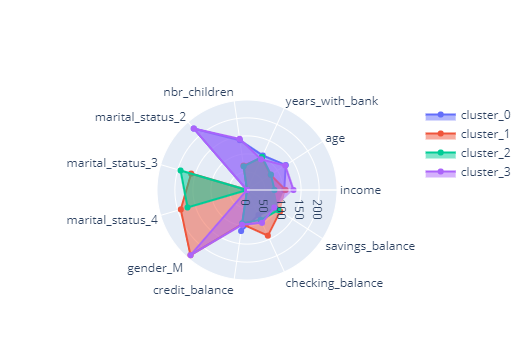

In [282]:
plot_radar_chart(Nik(df_cust_seg2, 'MinMax', 'KMeans', 4, epsilon=0.2, min_samples=10))

***Changing clusterization method***

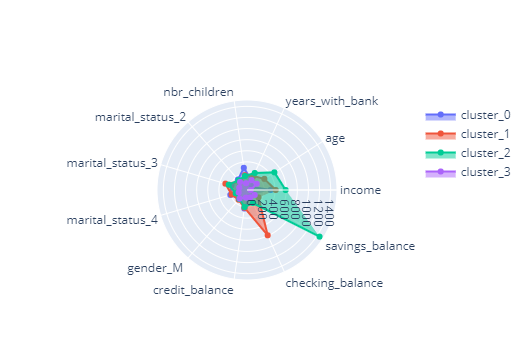

In [275]:
plot_radar_chart(Nik(df_cust_seg2, 'Robust', 'KMeans', 4, epsilon=0.2, min_samples=10))

***Analyzing only credit balances and their transactions***

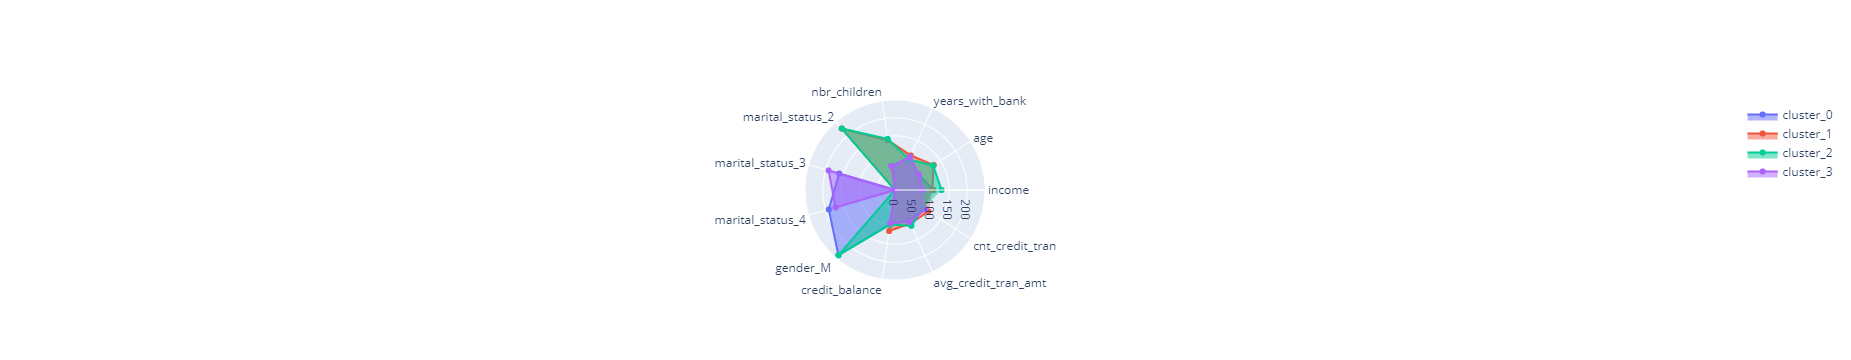

In [ ]:
df_cust_seg3 = df_cust_seg[['income', 'age', 'years_with_bank', 'nbr_children','marital_status_2', 'marital_status_3',
                            'marital_status_4', 'gender_M ', 'credit_balance','avg_credit_tran_amt','cnt_credit_tran']]
                           
plot_radar_chart(Nik(df_cust_seg3, 'MinMax', 'KMeans', 4, epsilon=0.2, min_samples=10)) 

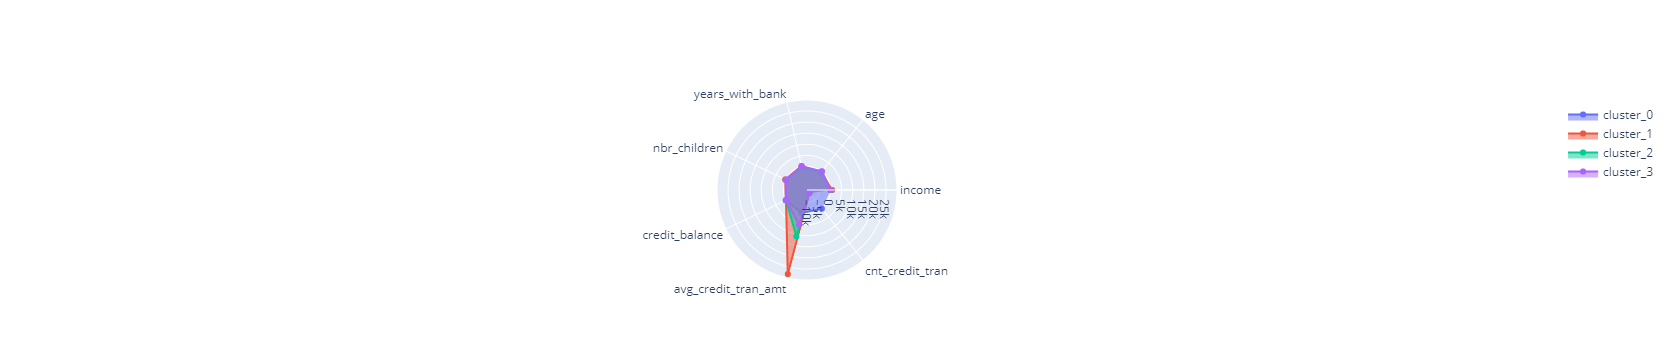

In [278]:
plot_radar_chart(Nik(df_cust_seg3, 'Robust', 'KMeans', 4, epsilon=0.2, min_samples=10))

***Analyzing saving balances with their transactions***

In [281]:
df_cust_seg.columns

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'credit_balance',
       'checking_balance', 'savings_balance', 'avg_tran_amt', 'count_tran_amt',
       'avg_savings_tran_amt', 'avg_checking_tran_amt', 'avg_credit_tran_amt',
       'cnt_savings_tran', 'cnt_checking_tran', 'cnt_credit_tran',
       'total_balance', 'marital_status_2', 'marital_status_3',
       'marital_status_4', 'gender_M '],
      dtype='object')

In [ ]:
df_cust_seg4 = df_cust_seg['income', 'age', 'years_with_bank', 'nbr_children', 'credit_balance',
                           'checking_balance', 'savings_balance', 'avg_tran_amt', 'count_tran_amt',
                           'avg_savings_tran_amt', 'avg_checking_tran_amt', 'avg_credit_tran_amt',
                           'cnt_savings_tran', 'cnt_checking_tran', 'cnt_credit_tran',
                           'total_balance', 'marital_status_2', 'marital_status_3',
                           'marital_status_4', 'gender_M ']

# PCA --> Scatterplot Visualizations

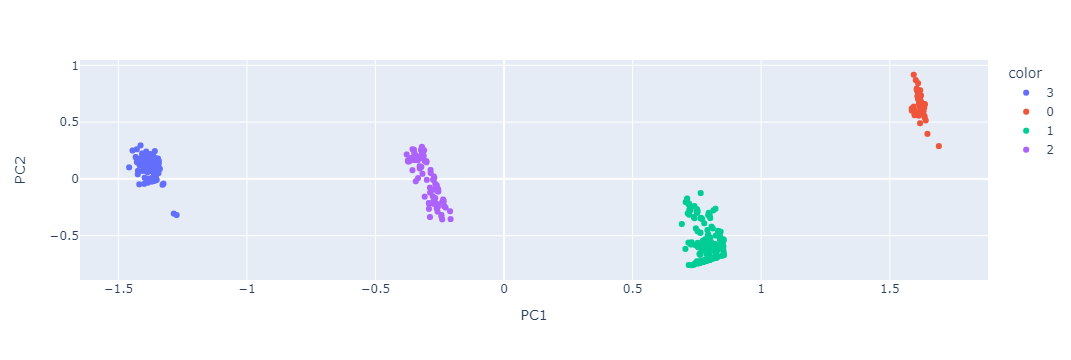

In [136]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components =pca.fit_transform(df_habits_scaled)
df_pca = pd.DataFrame(components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = df_habits_scaled['Cluster']

fig = px.scatter(df_pca, x='PC1', y='PC2', color=df_pca['Cluster'].astype(str))
fig.show()

In [137]:
df_pca

,PC1,PC2,Cluster
0,-1.359849,0.091270,3
1,-1.387201,0.124700,3
2,1.614585,0.691186,0
3,0.746009,-0.436416,1
4,-0.273514,-0.220076,2
...,...,...,...
660,0.825377,-0.694108,1
661,0.813839,-0.701242,1
662,-1.345871,0.178824,3
663,-0.361776,0.182073,2


# Banking behaviour

In [287]:
df_bank_info = df_cust_info3.copy()
df_bank_info = df_bank_info.merge(df_customer[['cust_id','city_name','state_code']],on='cust_id')
df_bank_info.head(3)

,cust_id,income,age,gender,nbr_children,marital_status,years_with_bank,credit_balance,checking_balance,savings_balance,...,count_tran_amt,avg_savings_tran_amt,avg_checking_tran_amt,avg_credit_tran_amt,cnt_savings_tran,cnt_checking_tran,cnt_credit_tran,total_balance,city_name,state_code
0,1362480,50890,33,M,2,2,9,20.00,86.86,1187.97,...,157.0,18.550769,-2.474646,60.895625,26.0,99.0,32.0,1254.83,New York City,NY
1,1362484,10053,42,F,0,1,6,369.72,95.32,2122.17,...,187.0,58.474545,-25.435758,16.797636,33.0,99.0,55.0,1847.77,Denver,CO
2,1362485,22690,25,F,0,1,8,1100.00,45.49,0.00,...,171.0,0.000000,-1.659495,-10.572639,0.0,99.0,72.0,-1054.51,New York City,NY


## What we know about the bank?

In [296]:
states_income = df_bank_info[['income','total_balance','state_code']].groupby('state_code').mean().reset_index()
states_income.head(3)

,state_code,income,total_balance
0,AL,10960.000000,-179.283333
1,AZ,20023.045455,692.406818
2,CA,22966.075472,391.819686


In [297]:
cities_income = df_bank_info[['income','total_balance','city_name']].groupby('city_name').mean().reset_index()
cities_income.head(3)

,city_name,income,total_balance
0,Albuquerque,20394.428571,-605.504286
1,Anaheim,18012.444444,-190.066667
2,Arlington,36464.000000,-593.470000


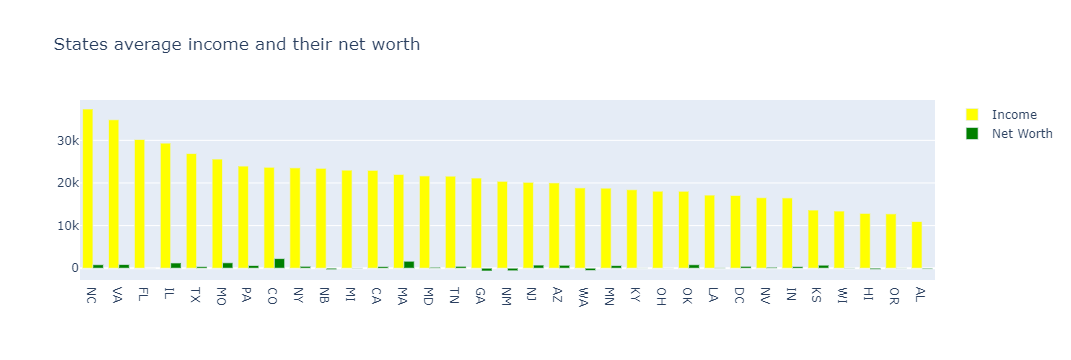

In [299]:
states_income = states_income.sort_values(['income','total_balance'],ascending=False)

trace1 = go.Bar(
    x = states_income['state_code'],
    y = states_income['income'],
    name = 'Income',
    marker=dict(color='yellow') 
)

trace2 = go.Bar(
    x = states_income['state_code'],
    y = states_income['total_balance'],
    name='Net Worth',
    marker=dict(color='green')
)

# create the layout
layout = go.Layout(
    title='States average income and their net worth'
)
data = [trace1, trace2]

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

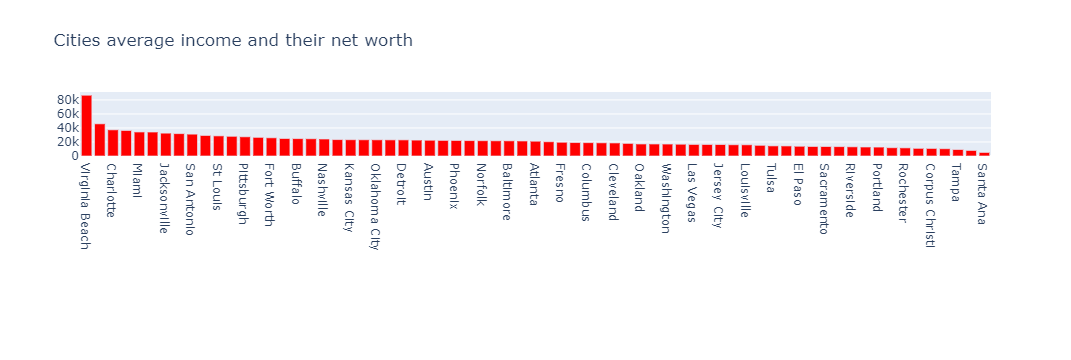

In [302]:
cities_income = cities_income.sort_values(['income','total_balance'],ascending=False)

trace1 = go.Bar(
    x = cities_income['city_name'],
    y = cities_income['income'],
    name = 'Income',
    marker=dict(color='red') 
)

#trace2 = go.Bar(
#    x = cities_income['city_name'],
#    y = cities_income['total_balance'],
#    name='Net Worth',
#    marker=dict(color='blue')
#)

# create the layout
layout = go.Layout(
    title='Cities average income and their net worth'
)
data = [trace1]#[trace1, trace2]

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [333]:
df_ages = df_bank_info[['cust_id','income','age']]
ages = df_ages[['cust_id','age']]
ages['<18'] = df_ages['income'][df_ages['age']<18]
ages['18-25'] = df_ages['income'][(df_ages['age']>=18) &(df_ages['age']<25)]
ages['25-35'] = df_ages['income'][(df_ages['age']>=25) &(df_ages['age']<35)]
ages['35-55'] = df_ages['income'][(df_ages['age']>=35) &(df_ages['age']<55)]
ages['55-65'] = df_ages['income'][(df_ages['age']>=55) &(df_ages['age']<65)]
ages['65+'] = df_ages['income'][df_ages['age']>=65]
ages.head(3)

,cust_id,age,<18,18-25,25-35,35-55,55-65,65+
0,1362480,33,NaN,NaN,50890.0,NaN,NaN,NaN
1,1362484,42,NaN,NaN,NaN,10053.0,NaN,NaN
2,1362485,25,NaN,NaN,22690.0,NaN,NaN,NaN


In [332]:
import seaborn as sns

plt.subplot(1,2,1)

sns.boxplot(x='age',y='income', data = ages)
plt.ylabel('')

ModuleNotFoundError: No module named 'seaborn'